## 5 Métodos de machine learning para predecir la obesidad a través de medidas corporales.

### Variables que usaremos
#### WC = circunferencia de la cintura 
#### HIP = circunferencia de la cadera 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nombre_archivo = "Dataset_limpio1.xlsx"

In [3]:
path_to_zips = "/home/dsc/Desktop/TFM/DATA/"

In [4]:
dataset = path_to_zips + nombre_archivo

In [5]:
df = pd.read_excel(path_to_zips + nombre_archivo)

In [6]:
df.head()

,Height,Weight,BMI,WC,HIP,WHR,SBP,DBP,LDL,TG,CHO,HDL,Fruit,Vegetable,beverage,Meat,breakfast
0,141.00,73.10,36.77,91.05,98.15,0.93,103.0,66.0,2.05,1.23,3.87,1.21,1.0,0.0,0,7.0,7
1,178.00,114.50,36.14,115.60,120.05,0.96,129.0,88.0,1.92,0.94,3.57,0.99,0.0,7.0,0,7.0,7
2,165.60,94.00,34.28,101.45,118.90,0.85,99.0,64.0,2.43,1.90,4.69,1.13,12.0,14.0,0,35.0,6
3,178.00,105.35,33.25,103.75,113.15,0.92,110.0,71.0,2.46,1.86,4.74,1.30,21.0,21.0,0,7.0,7
4,154.55,77.85,32.59,91.40,105.45,0.87,104.0,64.0,2.41,1.52,4.14,1.09,14.0,7.0,0,1.0,7


In [7]:
df.count()

Height       2243
Weight       2243
BMI          2243
WC           2243
HIP          2243
WHR          2243
SBP          2243
DBP          2243
LDL          2243
TG           2243
CHO          2243
HDL          2243
Fruit        2243
Vegetable    2243
beverage     2243
Meat         2243
breakfast    2243
dtype: int64

In [8]:
df.describe()

,Height,Weight,BMI,WC,HIP,WHR,SBP,DBP,LDL,TG,CHO,HDL,Fruit,Vegetable,beverage,Meat,breakfast
count,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000
mean,146.871534,39.937807,17.862773,64.156152,75.460945,0.852604,96.960098,61.665181,2.335132,0.864021,4.250736,1.386393,7.958805,12.367588,484.407044,10.666919,6.259474
std,16.800570,14.831251,3.581162,10.236568,11.923815,0.059235,9.016579,6.706842,0.624914,0.353803,0.711510,0.298333,7.482690,10.751437,1000.417567,10.312139,1.957737
min,114.250000,17.000000,11.600000,44.050000,51.050000,0.690000,72.500000,43.000000,0.390000,0.290000,2.120000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.500000,27.300000,15.170000,56.000000,65.000000,0.810000,90.000000,58.000000,1.890000,0.610000,3.765000,1.170000,3.000000,7.000000,0.000000,6.000000,7.000000
50%,145.050000,38.300000,17.300000,63.000000,75.750000,0.850000,97.000000,61.000000,2.280000,0.780000,4.200000,1.360000,7.000000,10.000000,250.000000,7.000000,7.000000
75%,160.700000,50.275000,19.850000,70.000000,84.550000,0.890000,101.500000,66.000000,2.750000,1.030000,4.710000,1.570000,10.500000,14.000000,500.000000,14.000000,7.000000
max,191.600000,114.500000,36.770000,115.600000,120.050000,1.370000,129.000000,90.000000,4.350000,2.430000,6.530000,2.380000,69.300000,69.300000,17325.000000,70.000000,7.000000


In [9]:
df.loc[:,"Sobrepeso"] = 0
df.head()

,Height,Weight,BMI,WC,HIP,WHR,SBP,DBP,LDL,TG,CHO,HDL,Fruit,Vegetable,beverage,Meat,breakfast,Sobrepeso
0,141.00,73.10,36.77,91.05,98.15,0.93,103.0,66.0,2.05,1.23,3.87,1.21,1.0,0.0,0,7.0,7,0
1,178.00,114.50,36.14,115.60,120.05,0.96,129.0,88.0,1.92,0.94,3.57,0.99,0.0,7.0,0,7.0,7,0
2,165.60,94.00,34.28,101.45,118.90,0.85,99.0,64.0,2.43,1.90,4.69,1.13,12.0,14.0,0,35.0,6,0
3,178.00,105.35,33.25,103.75,113.15,0.92,110.0,71.0,2.46,1.86,4.74,1.30,21.0,21.0,0,7.0,7,0
4,154.55,77.85,32.59,91.40,105.45,0.87,104.0,64.0,2.41,1.52,4.14,1.09,14.0,7.0,0,1.0,7,0


In [10]:
df["Sobrepeso"] = [1 if x>=25 else 0 for x in df["BMI"]]

In [81]:
df.sample(5)

,Height,Weight,BMI,WC,HIP,WHR,SBP,DBP,LDL,TG,CHO,HDL,Fruit,Vegetable,beverage,Meat,breakfast,Sobrepeso
1172,160.45,44.05,17.11,60.00,80.00,0.75,91.0,59.0,2.07,0.78,3.93,1.09,14.0,28.0,0,4.0,7,0
88,150.45,57.25,25.29,84.75,89.10,0.95,114.0,70.0,2.51,1.07,4.54,1.36,4.0,1.0,2250,14.0,7,1
1889,140.00,28.10,14.34,53.15,65.15,0.82,106.0,69.0,1.71,0.81,3.82,1.56,5.0,7.0,250,7.0,7,0
65,157.10,63.95,25.91,81.50,95.20,0.86,88.0,59.0,3.39,1.17,5.26,1.16,7.0,12.0,1250,14.0,7,1
1224,127.45,27.40,16.87,55.45,56.25,0.99,90.0,61.0,2.62,0.71,5.11,1.96,14.0,14.0,0,14.0,7,0


Height


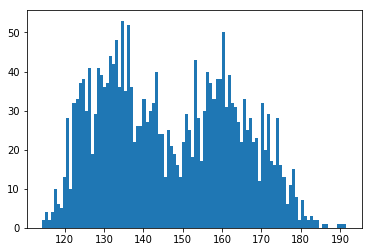

Weight


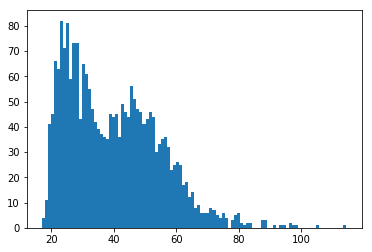

BMI


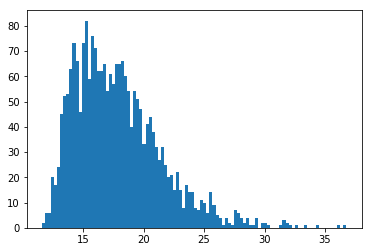

WC


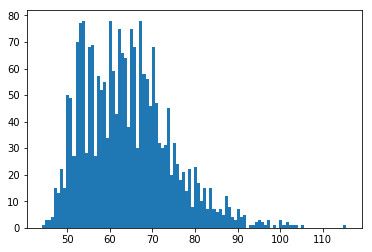

HIP


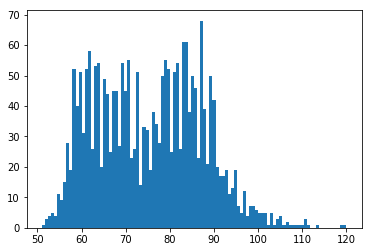

WHR


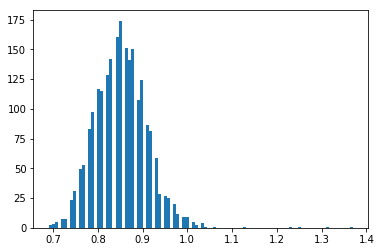

SBP


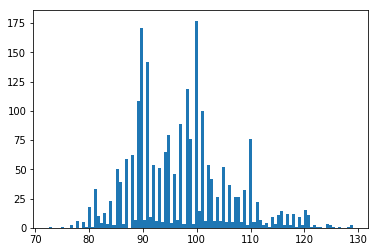

DBP


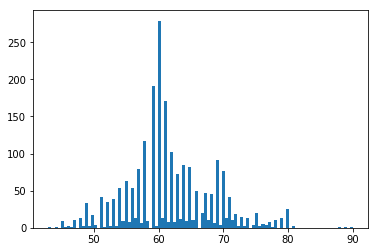

LDL


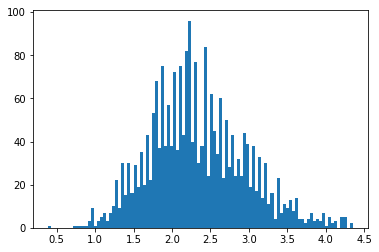

TG


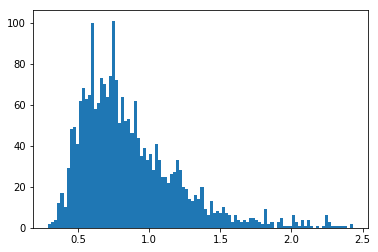

CHO


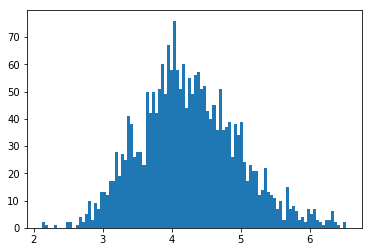

HDL


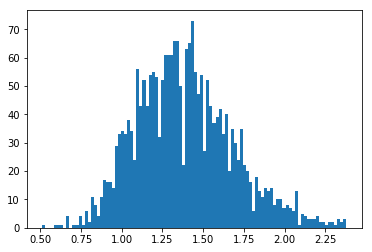

Fruit


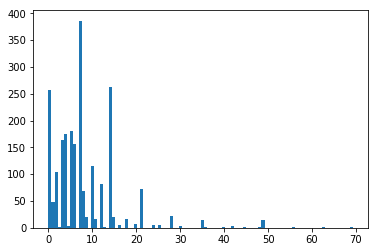

Vegetable


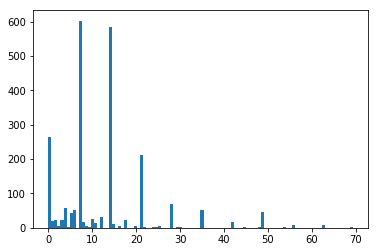

beverage


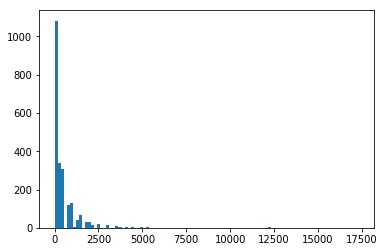

Meat


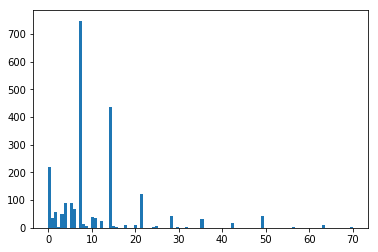

breakfast


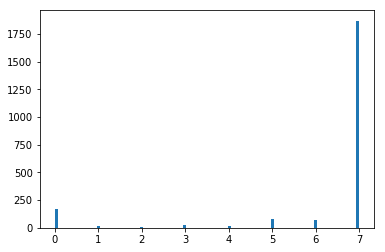

Sobrepeso


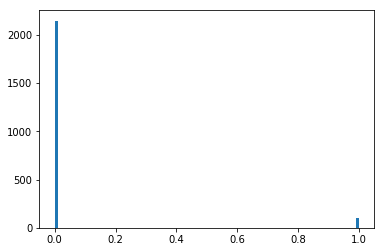

In [12]:
for x in df.columns:
    print(x)
    plt.hist(df[x].dropna().values,bins=100)
    plt.show()

## Train/Test sobrepeso si o no

In [13]:
X = df[["WC","HIP"]].values
y = df["Sobrepeso"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Decision Tree

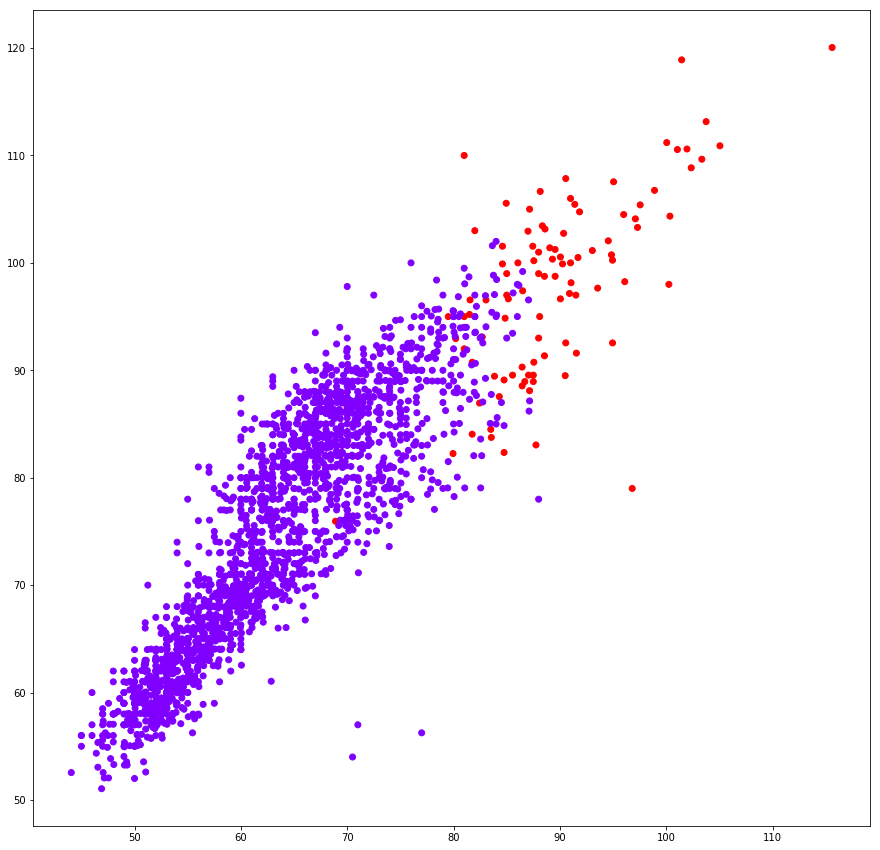

In [16]:
X = df[["WC","HIP"]].values
y = df["Sobrepeso"]
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1],c=y, cmap="rainbow")
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf=DecisionTreeClassifier(min_samples_leaf = 10)

In [65]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
print (cross_val_score(clf, X, y, cv=10,scoring="accuracy").mean())

0.9479323617339311


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
clf1=GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=20),
                  param_grid={"min_samples_leaf":np.arange(5,50)})
clf1.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
clf1.best_params_

{'min_samples_leaf': 12}

In [71]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [72]:
dot_data = tree.export_graphviz(clf,out_file=None)

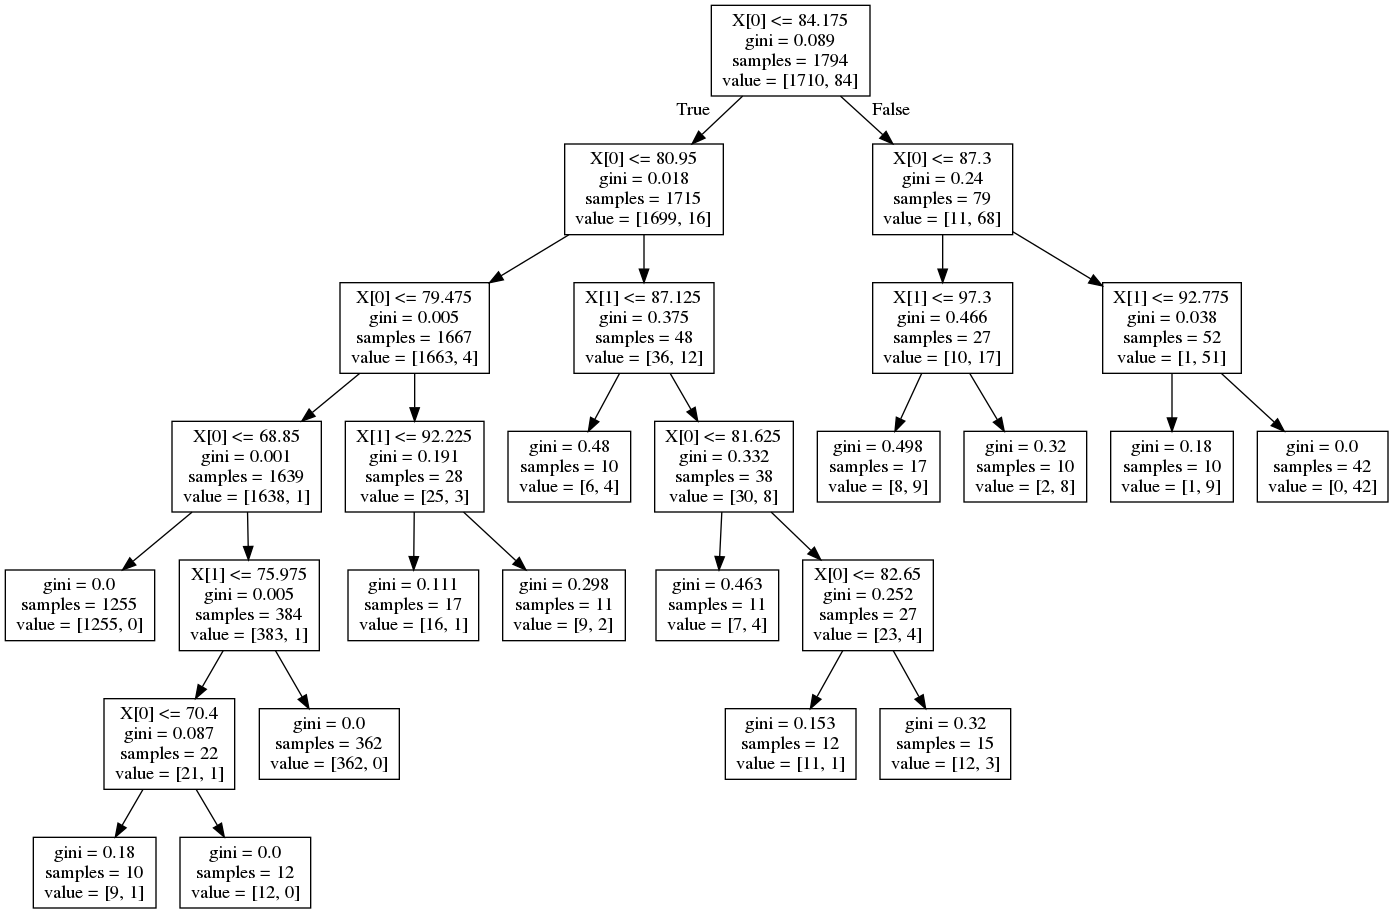

In [73]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

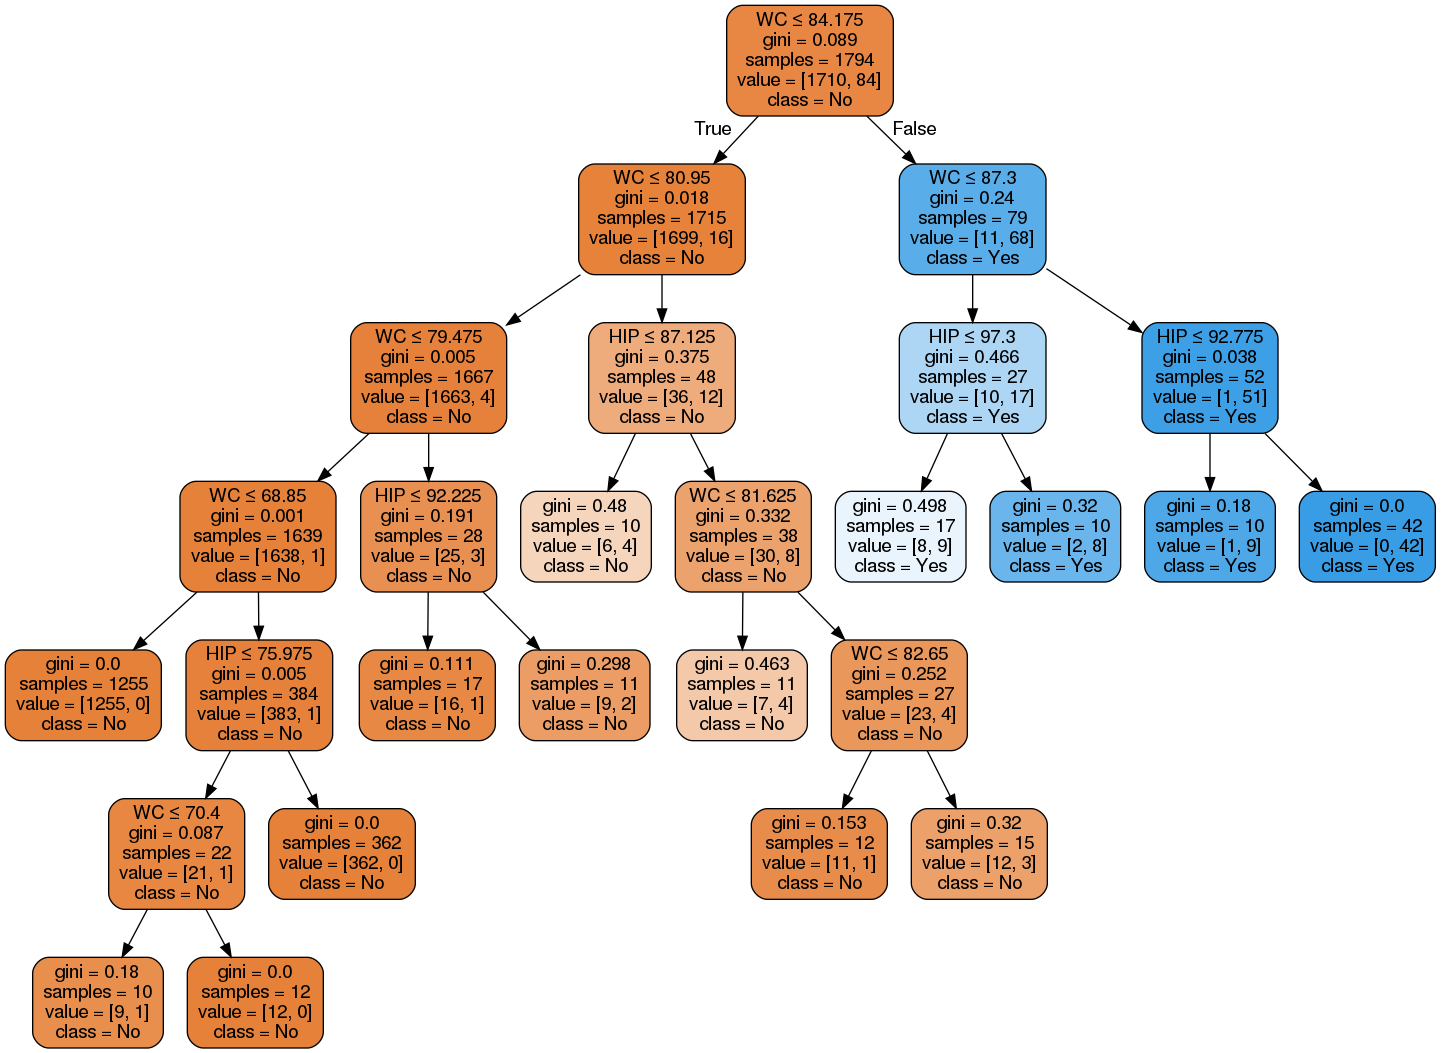

In [74]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["WC", "HIP"], 
                         class_names=["No","Yes"], 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [75]:
@interact(x= 60 , y= 65)
def show(x, y):
    return clf.predict([[x,y]])

interactive(children=(IntSlider(value=60, description='x', max=180, min=-60), IntSlider(value=65, description='y', max=195, min=-65), Output()), _dom_classes=('widget-interact',))

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rand = RandomForestClassifier(n_estimators=100,max_depth=4)

In [31]:
rand.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

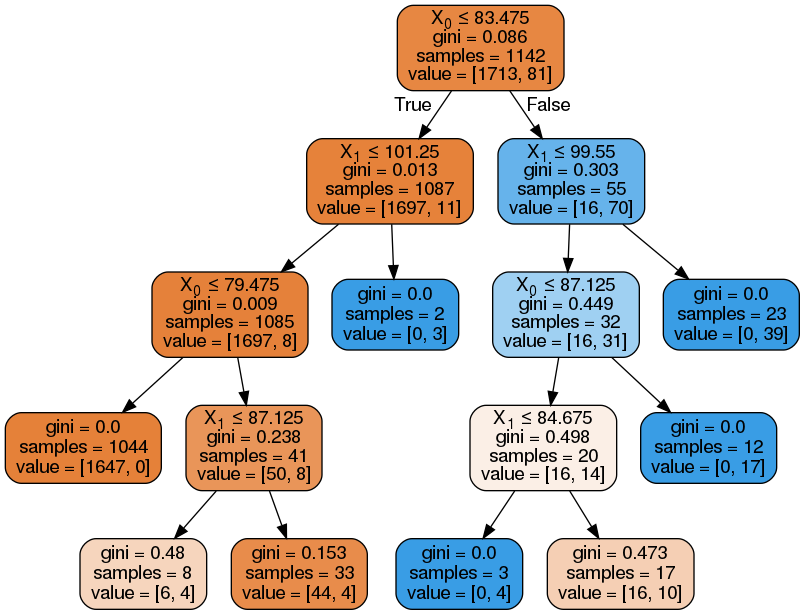

In [33]:
dot_data = tree.export_graphviz(rand.estimators_[5], out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [34]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

0.9577141077656772


In [35]:
rand.predict([[60, 75]])

array([0])

In [36]:
rand.predict([[70, 165]])

array([1])

In [37]:
from ipywidgets import interact

In [38]:
@interact(x= 60 , y= 65)
def show(x, y):
    return rand.predict([[x,y]])

interactive(children=(IntSlider(value=60, description='x', max=180, min=-60), IntSlider(value=65, description='y', max=195, min=-65), Output()), _dom_classes=('widget-interact',))

## Regresión

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
reg=LogisticRegression()

In [41]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
cross_val_score(reg,X,y).mean()

0.961657682423097

In [43]:
reg.predict([[65,86]])

array([0])

In [44]:
reg.predict([[100,120]])

array([0])

In [45]:
@interact(x= 60 , y= 65)
def show(x, y):
    return reg.predict([[x,y]])

interactive(children=(IntSlider(value=60, description='x', max=180, min=-60), IntSlider(value=65, description='y', max=195, min=-65), Output()), _dom_classes=('widget-interact',))

## K nearest neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=6)

In [47]:
clf2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,clf2.predict(X_test))

0.9910913140311804

In [50]:
clf2 = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=6),
                    param_grid={"n_neighbors":np.arange(1,50)},)
clf2.fit(X,y)
clf2.best_params_

{'n_neighbors': 2}

In [51]:
clf2.best_score_

0.937137761925992

In [52]:
accuracy_score(y_test,clf2.predict(X_test))

0.9955456570155902

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cross_val_score(KNeighborsClassifier(n_neighbors=1),X,y).mean()

0.9313618108798831

In [55]:
@interact(k=10)
def show(k):
    print(cross_val_score(KNeighborsClassifier(n_neighbors=k),X,y).mean())

interactive(children=(IntSlider(value=10, description='k', max=30, min=-10), Output()), _dom_classes=('widget-interact',))

## Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier

In [57]:
bclf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,oob_score=True)

In [58]:
bclf.fit(X_train,y_train)
bclf.oob_score_

0.9632107023411371

In [59]:
accuracy_score(y_test,bclf.predict(X_test))

0.9799554565701559

In [60]:
bclf.predict([[65,86]])

array([0])

In [61]:
@interact(x= 60 , y= 65)
def show(x, y):
    return bclf.predict([[x,y]])

interactive(children=(IntSlider(value=60, description='x', max=180, min=-60), IntSlider(value=65, description='y', max=195, min=-65), Output()), _dom_classes=('widget-interact',))